<a href="https://colab.research.google.com/github/Arcanjolave/Proyecto-DS-Arcanjo-Luciana/blob/main/Arcanjo_Luciana_Entrega_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cambios en la producción de animes vanguardistas en las últimas cuatro décadas
*Aproximaciones a cambios en las clasificaciones y tipos de producción de anime vanguardista*

Luciana Arcanjo

# Abstract




En el marco de la exploración de Python como herramienta para la ciencia de datos, el presente trabajo propone un acercamiento a la investigación del vanguardismo (o Avant Garde) en la industria del anime, centrándose en el tipo de producciones y clasificaciones durante las últimas cuatro décadas (1980-2022). Este ejercicio servirá como base para una investigación de mayor alcance, orientada a comparar las narrativas contemporáneas en la producción artística entre Japón y Occidente.

Para llevar a cabo este estudio, se utiliza la base de datos "Anime Dataset 2023", disponible en la plataforma Kaggle. Los datos incluyen información detallada sobre diversas dimensiones del anime, como el nombre, estado de finalización, productora, género, clasificación, entre otros (https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset)

En primera instancia, se realizará un análisis exploratorio de los datos, con el fin de entender la distribución de las variables clave, identificar posibles valores atípicos y examinar las correlaciones entre diferentes características. Posteriormente, se emplea un modelo de regresión lineal para analizar la relación entre la puntuación (Score) de los animes y varias características, tales como el número de episodios, la popularidad y el número de miembros que los han añadido a sus listas.

Los resultados del modelo esperan ofrecer una visión de los factores más influyentes en la puntuación y alcance de los animes, lo que permitiría identificar tendencias clave en la evolución del Avant Garde durante las últimas décadas.

#Variables

La base de datos cuenta con 24 columnas, descritas a continuación:

-anime_id: ID único para cada anime

-Name: El nombre del anime en su idioma original.

-English name: El nombre en inglés del anime.

-Other name: Nombre o título nativo del anime (puede estar en japonés, chino o
coreano).

-Score: La puntuación o calificación dada al anime.

-Genres: Los géneros del anime, separados por comas.

-Synopsis: Una breve descripción o resumen de la trama del anime.

-Type: El tipo de anime (por ejemplo, serie de TV, película, OVA, etc.).

-Episodes: El número de episodios del anime.

-Aired: Las fechas en las que se emitió el anime.

-Premiered: La temporada y el año en que se estrenó el anime.

-Status: El estado del anime (por ejemplo, Finalizado, En emisión, etc.).

-Producers: Las compañías de producción o productores del anime.

-Licensors: Los licenciatarios del anime (por ejemplo, plataformas de
streaming).

-Studios: Los estudios de animación que trabajaron en el anime.

-Source: El material de origen del anime (por ejemplo, manga, novela ligera, original).

-Duration: La duración de cada episodio.

-Rating: La clasificación por edad del anime.

-Rank: El rango del anime basado en popularidad u otros criterios.

-Popularity: El rango de popularidad del anime.

-Favorites: El número de veces que los usuarios marcaron el anime como favorito.

-Scored By: El número de usuarios que calificaron el anime.

-Members: El número de miembros que han añadido el anime a su lista en la plataforma.

-Image URL: La URL de la imagen o póster del anime.




#Hipotesis


* H1: La producción de anime vanguardista ha experimentado cambios significativos en sus patrones de clasificación, tipo de producción y fuentes de inspiración a lo largo de las últimas cuatro décadas (1980-2022).

* H2:  Existe una correlación significativa entre la popularidad y la puntuación de los animes vanguardistas.

# Objetivos

* O1: Explorar las tendencias en la clasificación de anime vanguardista desde 1980 hasta 2022
* O2: Explorar las tendencias en los tipos de producción de anime vanguardista desde 1980 hasta 2022
* O3: Evaluar la relación entre la popularidad y puntuación en los anime vanguardistas desde 1980 hasta 2022

# Lectura de datos

In [ ]:
from google.colab import drive

#EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

#Algoritmos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("https://drive.google.com/uc?export=download&id=1DB9KewIzhGHVwCFD-2XN2c0Iq643nEA8")

In [ ]:
#Ver con qué tipo de dato estoy trabajando
data.dtypes

,0
anime_id,int64
Name,object
English name,object
Other name,object
Score,object
Genres,object
Synopsis,object
Type,object
Episodes,object
Aired,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [ ]:
#Ver cuánta cantidad de información hay
data.shape

(24905, 24)

In [ ]:
data.size


597720

In [ ]:
#Corroborar que no hayan duplicados
print(sum(data.duplicated()))

0


# Data Wrangling
Limpieza, transformación y organización de datos

In [ ]:
#Voy a empezar eliminando las variables que no serán de utilidad para el análisis
data = data.drop(columns=['Name', 'Other name', 'Synopsis', 'Status', 'Duration', 'Image URL'])
print(data.columns)

Index(['anime_id', 'English name', 'Score', 'Genres', 'Type', 'Episodes',
       'Aired', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source',
       'Rating', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members'],
      dtype='object')


In [ ]:
#De las variables de interés que posteriormente convertiré en flotantes, veré cuántos datos se establecen como desconocidos (UNKNOWN) para ver qué decisión puedo tomar en torno a ellos

variablesdesc = ['Score', 'Episodes', 'Rank']
unknown_variables = (data[variablesdesc] == 'UNKNOWN').sum()

print(unknown_variables)

Score       9213
Episodes     611
Rank        4612
dtype: int64


In [ ]:
#Dado que las columnas de Score son demasiadas para asignarles un valor cero o eliminalas, voy a asignarles al valor UNKNOWN un valor correspondiente a la mediana del Score
data['Score'] = data['Score'].replace('UNKNOWN', 0)
data['Score'] = data['Score'].astype('float64');
data['Score'] = data['Score'].replace('0', data['Score'].median())

#Por otro lado, los valores de Rank que se presentan como UNKNOWN van a quedar en cero, porque debieran ser valores unicos y son muchos para eliminarlos
data['Rank'] = data['Rank'].replace('UNKNOWN', 0)
data['Rank'] = data['Rank'].astype('float64')

In [ ]:
#Reorganizar la columna Aired, para que me de la fecha de inicio y fin de las emisiones en columnas separadas. Voy a hacer Start y End, aunque para el análisis solo voy a ocupar Start
data[['Start', 'End']] = data['Aired'].str.split(' to ', expand=True)

In [ ]:
#Conversión a fecha usando mixed
data["Start"] = pd.to_datetime(data["Start"], errors="coerce")
data["End"] = pd.to_datetime(data["End"], errors="coerce")

In [ ]:
#Extraer el Año de Start
data["Year"] = data["Start"].dt.year

In [ ]:
print(data.columns)

Index(['anime_id', 'English name', 'Score', 'Genres', 'Type', 'Episodes',
       'Aired', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source',
       'Rating', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members',
       'Start', 'End', 'Year'],
      dtype='object')


In [ ]:
#Como primera aproximación, voy a agrupar las clasificaciones en torno a los años, para ver si ha habido algún cambio significativo en el público al cual va dirigida la producción de anime
data.groupby(["Year", "Rating"])[("Year")].count()

Year    Rating                        
1917.0  G - All Ages                       12
1918.0  G - All Ages                        8
        UNKNOWN                             1
1926.0  G - All Ages                        1
1927.0  G - All Ages                        2
                                         ... 
2023.0  PG-13 - Teens 13 or older         279
        R - 17+ (violence & profanity)     40
        R+ - Mild Nudity                    5
        Rx - Hentai                        31
        UNKNOWN                            72
Name: Year, Length: 413, dtype: int64

##Outliers

Se elaborará un grafico de boxplot y uno de dispersión para evaluar la cantidad de outliers y ver cómo proceder al análisis

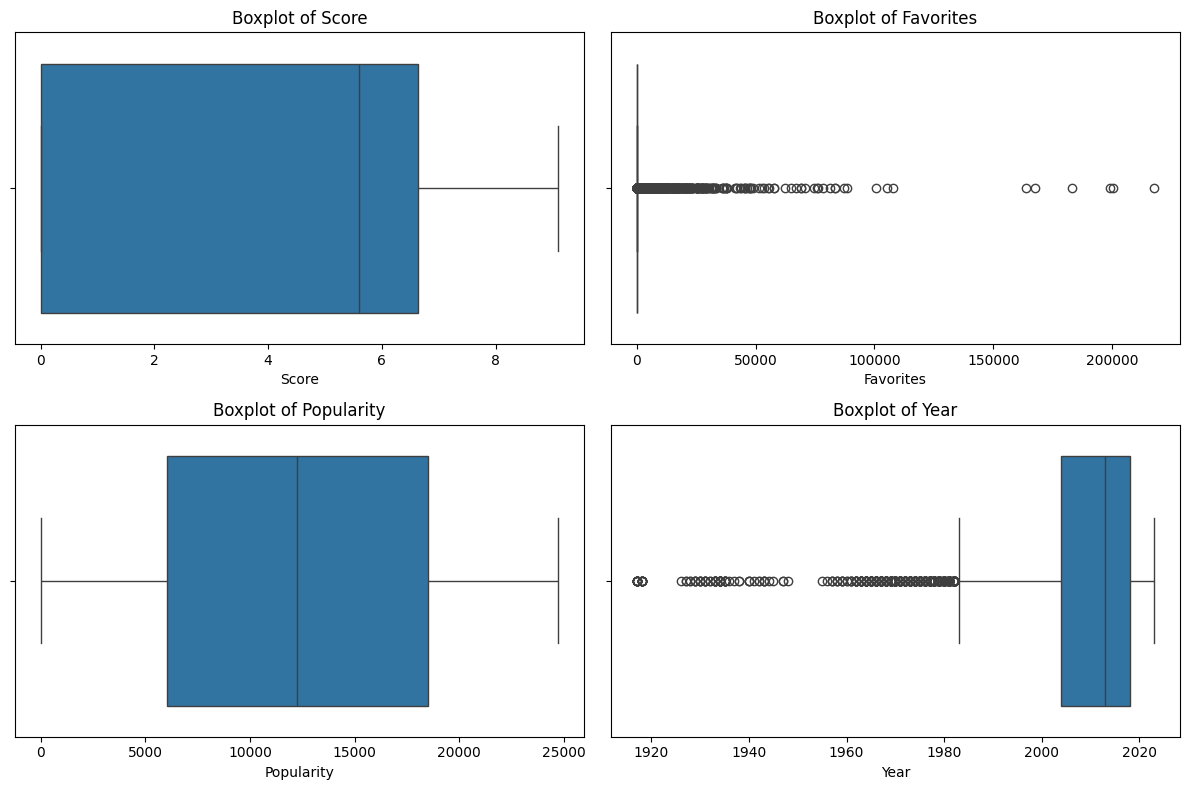

In [ ]:
#Boxplot
columnasnum = ['Score', 'Favorites', 'Popularity', 'Year']
plt.figure(figsize=(12, 8))
for i, column in enumerate(columnasnum, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

*	Score y Popularity no muestran muchos valores atípicos
*	Favorites contiene muchos outliers (sobre 50.000)
*	Year muestra un poco más de sesgo en los valores recientes y en los posteriores a 1980

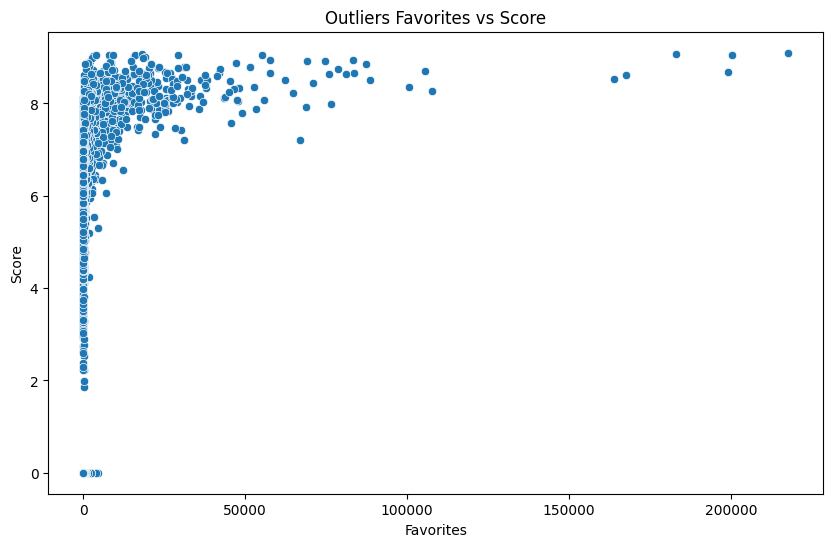

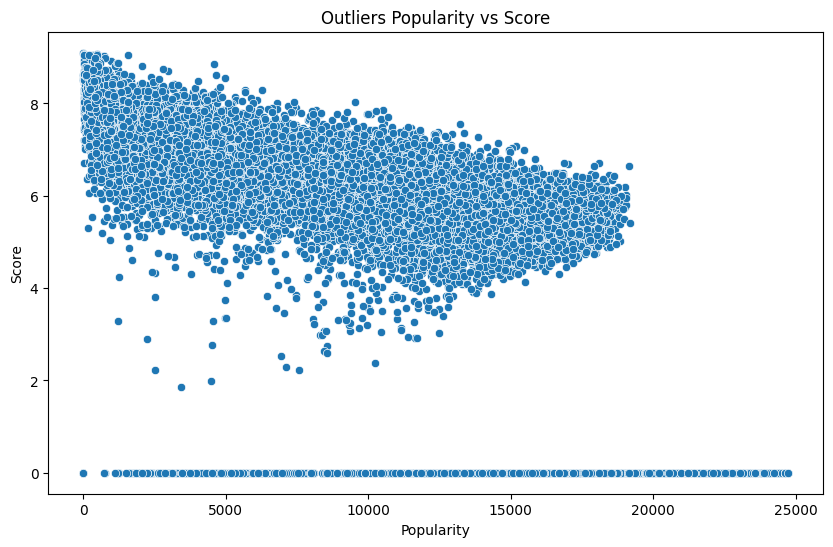

In [ ]:
#Gráfico de dispersión
#Score vs Favorites
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Favorites', y='Score')
plt.title('Outliers Favorites vs Score')
plt.show()

#Score vs Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Popularity', y='Score')
plt.title('Outliers Popularity vs Score')
plt.show()

* Para el análisis, puede ser más enriquecedor utilizar el gráfico de dispersión en lugar del boxplot, ya que los valores atípicos son más evidentes en este gráfico, especialmente en los puntos con alta popularidad y bajo puntuaje, o viceversa.

* La mayoría de los datos de Popularidad y Puntuación se agrupan en la parte superior izquierda del gráfico, sugiriendo que los animes con menor popularidad tienden a tener puntuacionesmás altas

* Los puntos en la parte inferior del gráfico (Score cercanos a 0) pueden venir dados a animes que no lograron captar el interés del público o que pertenecen a nichos muy específicos que no resonaron con la mayoría de los espectadores que utilizan las aplicaciones de valoración de las que se nutre esta base de datos.

En conclusion pesar de que los outliers son más bien numerosos, en el análisis de fenómenos culturales éstos pueden representar producciones que, si bien son atípicas, pueden tener un impacto  significativo. Esto es especialmente relevante en fenómenos como en vanguardismo, cuya principal característica es la innovación y ruptura con lo convencional. De esta manera, se procede a mantener los outliers, ya que eliminarlos puede llevar a conclusiones sesgadas o una compresión incompleta del panorama que se busca estudiar.

In [ ]:
#Para tener una exposición más gráfica de los datos anteriores, voy a filtrar los datos para eliminar los "UNKNOWN" en Ratings
data = data[data["Rating"] != "UNKNOWN"]

#Dada la temporalidad que me interesa estudiar, voy a filtrar para mantener solo el rango 1980 y 2022
data = data[(data["Year"] >= 1980) & (data["Year"] <= 2022)]

#Agrupar los datos por Rating y Year, y contar
rating_counts = data.groupby(["Rating", "Year"])["Rating"].count().unstack(fill_value=0)

#EDA: Análisis Exploratorio de datos

Para responder a si la producción de anime ha experimentado cambios en torno a sus categorías en las últimas cuatro décadas (1980-2022). Voy a elaborar un gráfico de torta para ver el panorama general de las categorías (Ratings) de la producción de anime

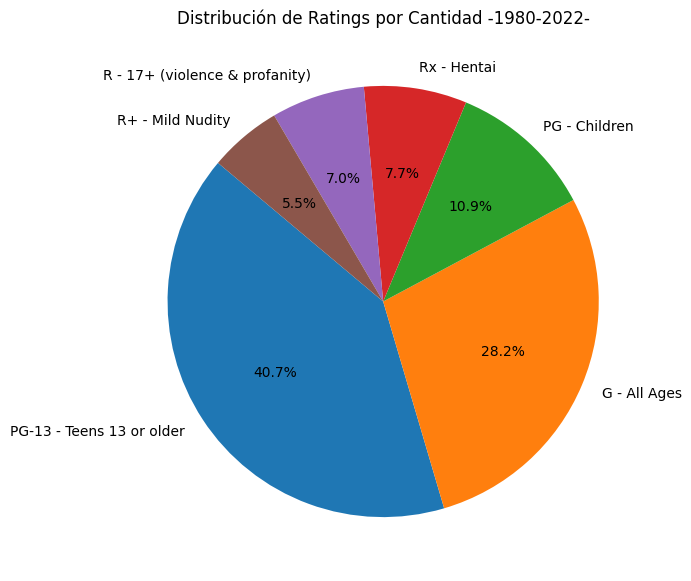

In [ ]:
#Empiezo por contar los ratings
rating_count = data['Rating'].value_counts()

#Elaboro gráfico de torta
plt.figure(figsize=(10, 7))
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ratings por Cantidad -1980-2022-')
plt.show()

En el gráfico anterior queda expuesto que la gran mayoría de las producciones de anime entre los años 1980 y 2022 van dirigidas a un público general u adolescente (G y PG13), seguido de un público adulto (R17, Rx y R+) y, finalmente, aquellos de contenido infantil (PG)

<Figure size 1400x700 with 0 Axes>

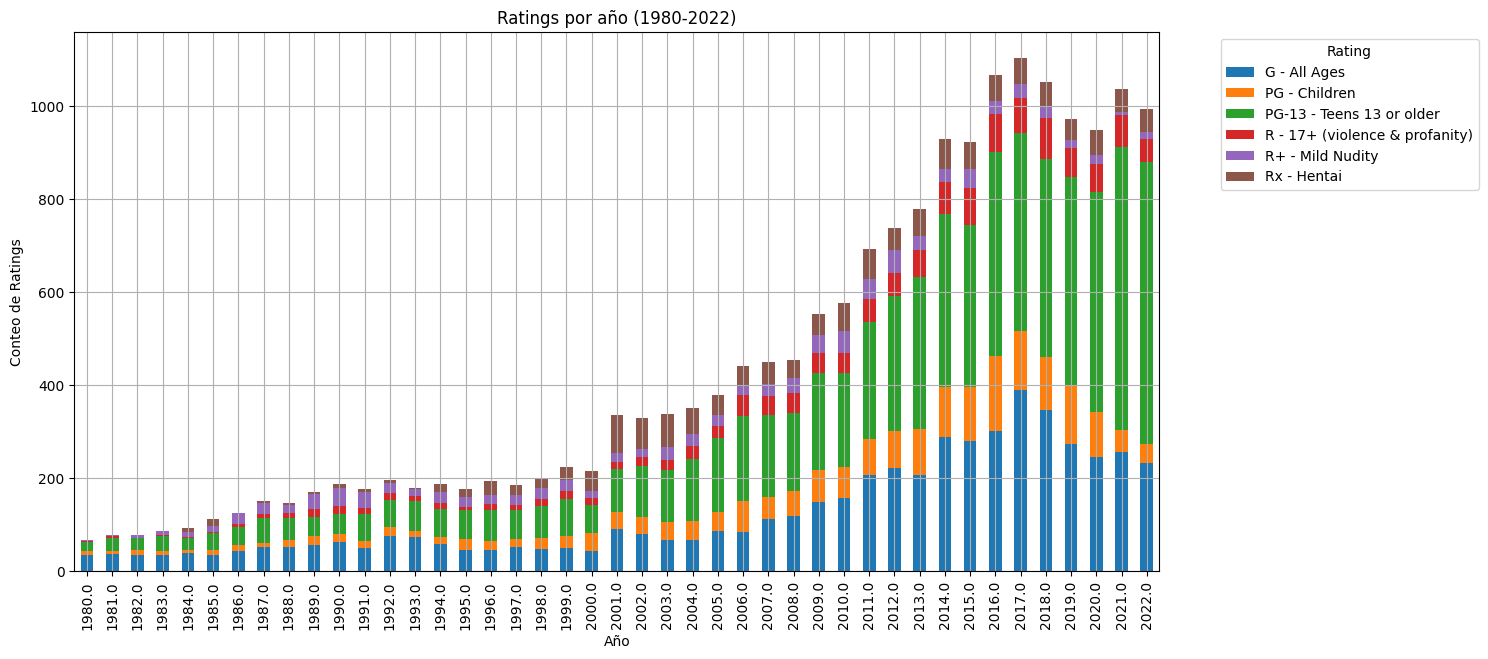

In [ ]:
#Para entender cómo dichas categorizaciones han ido cambiando durante los años, voy a elaborar un gráfico de barras
plt.figure(figsize=(14, 7))
rating_counts.T.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel("Año")
plt.ylabel("Conteo de Ratings")
plt.title("Ratings por año (1980-2022)")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

En el gráfico anterior, puede verse que la distribución del primer gráfico de tipo torta ha sido más bien sostenida durante el tiempo. Sin embargo, se ve también un aumento de los animes de categoría adulta (R) posterior al año 2000

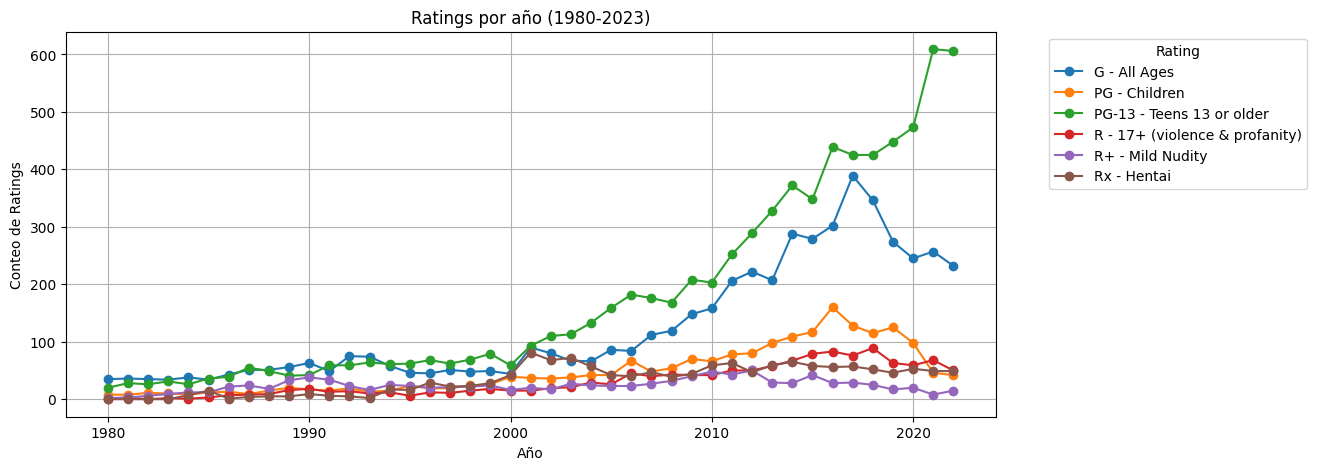

In [ ]:
#Para practicar, voy a hacer lo mismo, pero en Gráfico de líneas
plt.figure(figsize=(12, 5))

for rating in rating_counts.index:
    plt.plot(rating_counts.columns, rating_counts.loc[rating], marker='o', label=rating)

plt.xlabel("Año")
plt.ylabel("Conteo de Ratings")
plt.title("Ratings por año (1980-2023)")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

En ambos gráficos puede verse un incremento sustancial en la producción de anime desde inicios de la década del 2000. Esto puede venir dado por la proliferación de técnicas digitales en la animación, que vinieron a abaratar los costos de producción y mermaron la mano de obra necesaria. Pero para ahondar en ello se necesitaría un análisis más profundo.

Otro aspecto que me interesa abarcar, y que menciono en la hipótesis III es el formato (Type) en el cual los animes fueron producidos durante aquellas décadas, y si se presentó algún cambio significativo a través del tiempo.

<Figure size 1400x700 with 0 Axes>

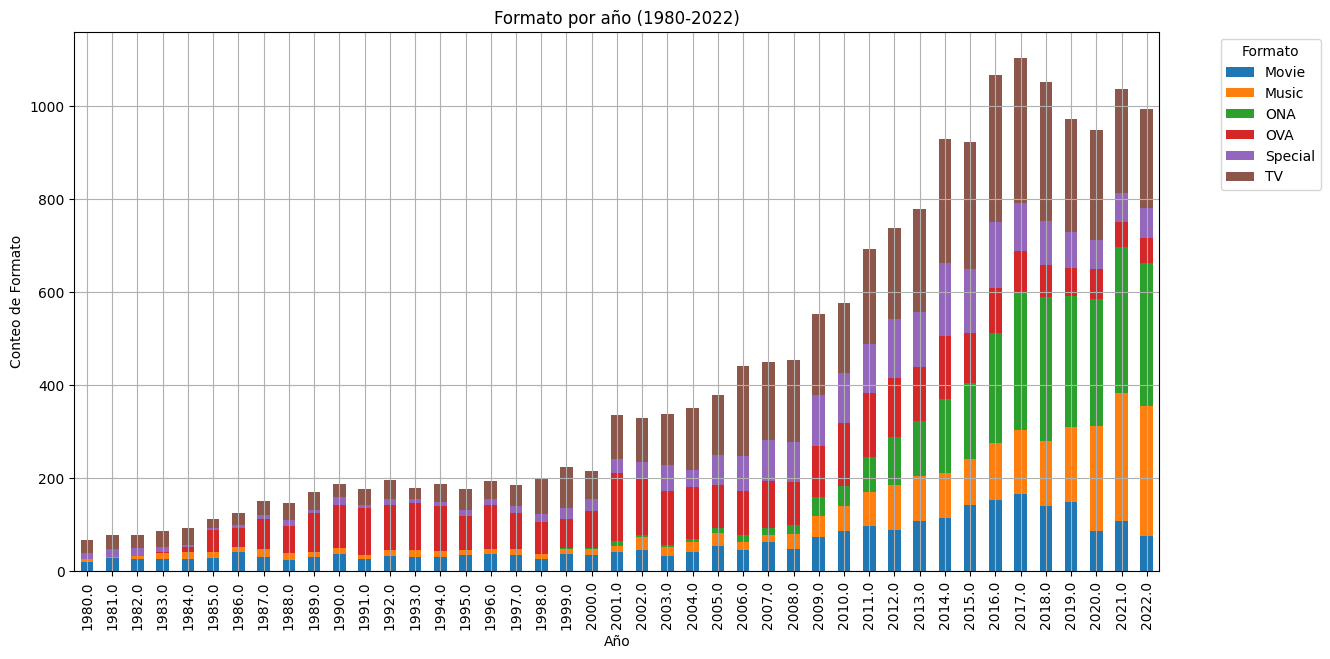

In [ ]:
#Agrupar los datos por Type y Year, y contar
type_count = data.groupby(["Type", "Year"])["Type"].count().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
type_count.T.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel("Año")
plt.ylabel("Conteo de Formato")
plt.title("Formato por año (1980-2022)")
plt.legend(title="Formato", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
#Aparición del ONA (Original Net Animation) en potencial reemplazo del OVA (Original Video Animation). Tiene sentido debido a los avances en digitalización y servicios de streaming, pero para ahondar se necesitarían más datos

In [ ]:
#Como me interesa trabajar con los animes del vanguardismo, voy a establecer el filtro pertienente en Genres
data_vanguardismo = data[data['Genres'].str.contains('Avant Garde')]
data_vanguardismo
#También voy a hacer otro filtro para los demás generos, y así poder comparar
otros_generos = data[~data['Genres'].str.contains('Avant Garde')]

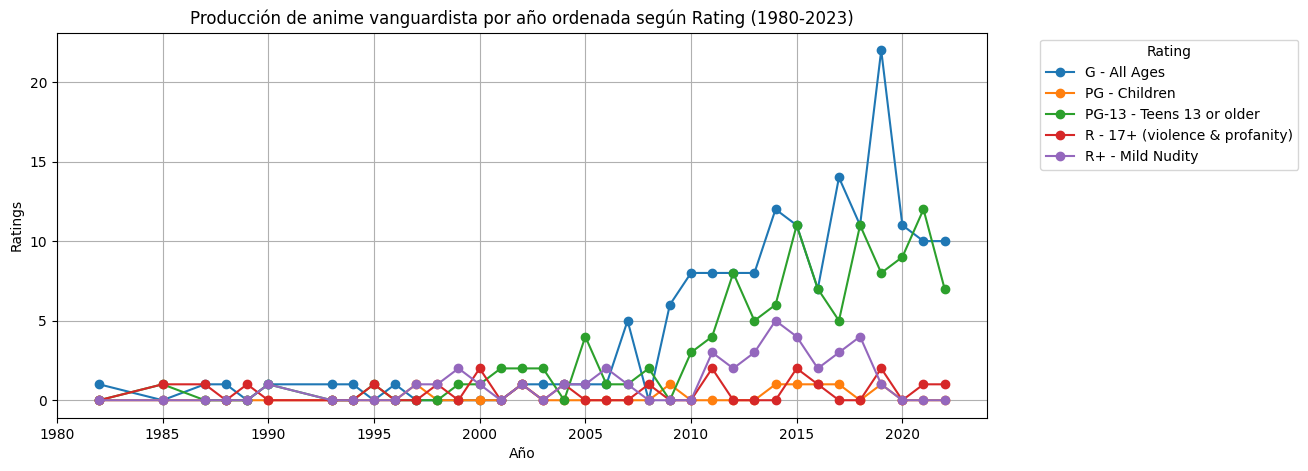

In [ ]:
# Extraer el año de la columna 'Start' en los filtros creados anteriormente
data_vanguardismo.loc[:, "Year"] = data_vanguardismo["Start"].dt.year
otros_generos.loc[:, "Year"] = otros_generos["Start"].dt.year

# Filtrar los datos para eliminar los Ratings "UNKNOWN" y el Rx-Hentai, ya que son muy pocos
data_vanguardismo = data_vanguardismo[(data_vanguardismo["Rating"] != "UNKNOWN") & (data_vanguardismo["Rating"] != "Rx - Hentai")]
otros_generos = otros_generos[(otros_generos["Rating"] != "UNKNOWN") & (otros_generos["Rating"] != "Rx - Hentai")]

# Agrupar los datos por Rating y Year, y contar
rating_counts_vanguardismo = data_vanguardismo.groupby(["Rating", "Year"])["Rating"].count().unstack(fill_value=0)
rating_counts_otros = otros_generos.groupby(["Rating", "Year"])["Rating"].count().unstack(fill_value=0)

# Generar el gráfico de líneas y observar las tendencias
plt.figure(figsize=(12, 5))

for rating in rating_counts_vanguardismo.index:
    plt.plot(rating_counts_vanguardismo.columns, rating_counts_vanguardismo.loc[rating], marker='o', label=rating)

plt.xlabel("Año")
plt.ylabel("Ratings")
plt.title("Producción de anime vanguardista por año ordenada según Rating (1980-2023)")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

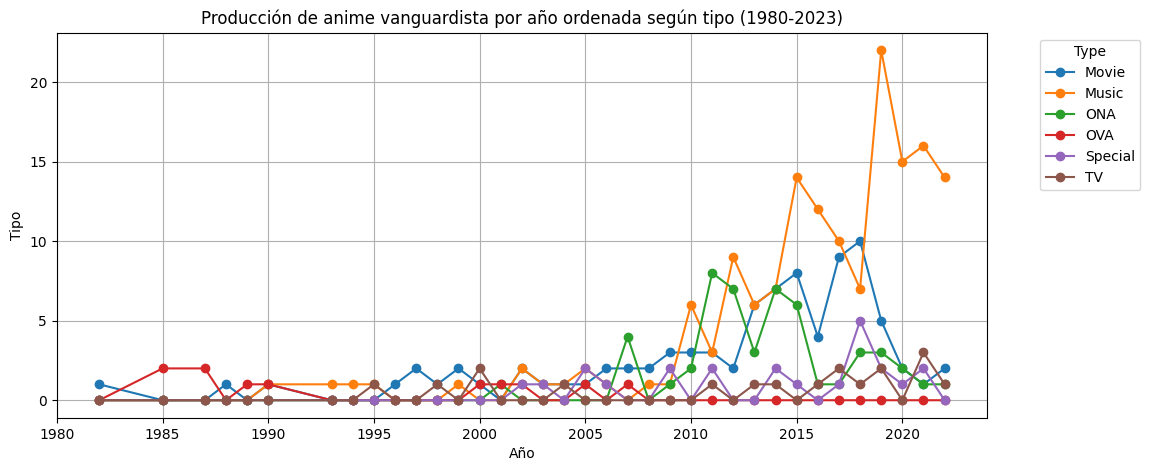

In [ ]:
# Agrupar los datos por Type y Year, y contar
type_counts_vanguardismo = data_vanguardismo.groupby(["Type", "Year"])["Type"].count().unstack(fill_value=0)

# Generar el gráfico de líneas
plt.figure(figsize=(12,5))

for t in type_counts_vanguardismo.index:
    plt.plot(type_counts_vanguardismo.columns, type_counts_vanguardismo.loc[t], marker='o', label=t)

plt.xlabel("Año")
plt.ylabel("Tipo")
plt.title("Producción de anime vanguardista por año ordenada según tipo (1980-2023)")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Finalmente, para trabajar la hipótesis IV voy a trabajar y graficar las variables de popularidad y puntuación del anime vanguardista en comparación a los demás generos en su conjunto.

In [ ]:
# Para empezar, crearé la variable de popularidad en vanguardismo y en otros:

vanguardismo_popularidad = data_vanguardismo[pd.to_numeric(data_vanguardismo['Score'], errors='coerce').notnull()]
otros_popularidad = otros_generos[pd.to_numeric(otros_generos['Score'], errors='coerce').notnull()]

vanguardismo_popularidad['Score'] = vanguardismo_popularidad['Score'].astype(float)
otros_popularidad['Score'] = otros_popularidad['Score'].astype(float)

# Limpiar las filas sin valores numericos en Popularity
vanguardismo_popularidad = vanguardismo_popularidad[pd.to_numeric(vanguardismo_popularidad['Popularity'], errors='coerce').notnull()]
otros_popularidad = otros_popularidad[pd.to_numeric(otros_popularidad['Popularity'], errors='coerce').notnull()]

# Convertir Popularity a flotante
vanguardismo_popularidad['Popularity'] = vanguardismo_popularidad['Popularity'].astype(float)
otros_popularidad['Popularity'] = otros_popularidad['Popularity'].astype(float)

# Calcular el promedio de popularidad en vanguardismo y otros géneros
vang_popromedio = vanguardismo_popularidad['Popularity'].mean()
otros_popromedio = otros_popularidad['Popularity'].mean()

# Agrupar por año
vang_popromedio = data_vanguardismo.groupby('Year')['Popularity'].mean().reset_index()
vang_popromedio['Genre'] = 'Vanguardismo'

otros_popromedio = otros_generos.groupby('Year')['Popularity'].mean().reset_index()
otros_popromedio['Genre'] = 'Otros'

# Concatenarr
vang_promedio = pd.concat([vang_popromedio, otros_popromedio])

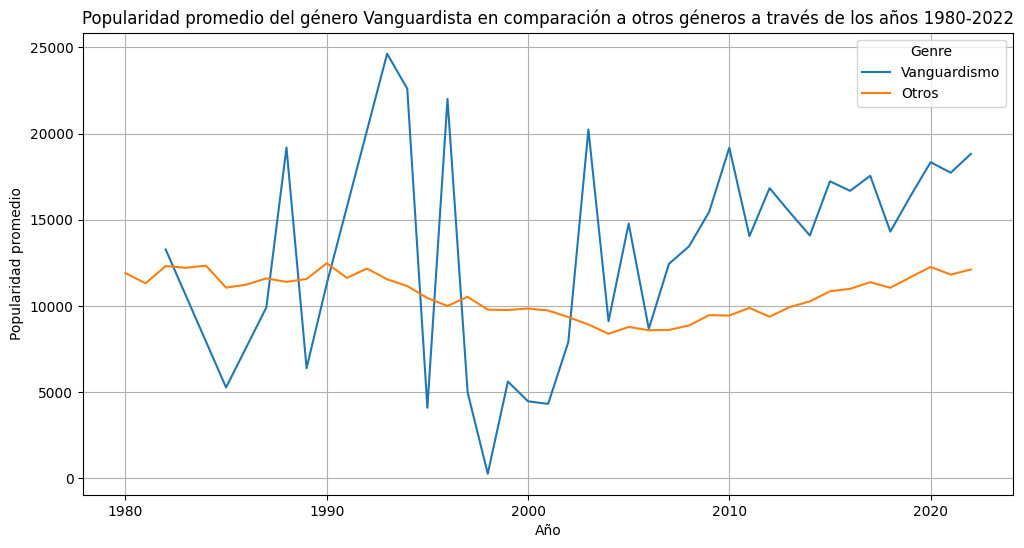

In [ ]:
# Gráfico usando seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=vang_promedio, x='Year', y='Popularity', hue='Genre')
plt.title('Popularidad promedio del género Vanguardista en comparación a otros géneros a través de los años 1980-2022')
plt.xlabel('Año')
plt.ylabel('Popularidad promedio')
plt.grid(True)
plt.show()

In [ ]:
# Como hay demasiada diferencia de valores entre el vanguardismo y otros géneros, voy a calcular la mediana de popularidad
vang_mediana = vanguardismo_popularidad['Popularity'].median()
otros_mediana = otros_popularidad['Popularity'].median()

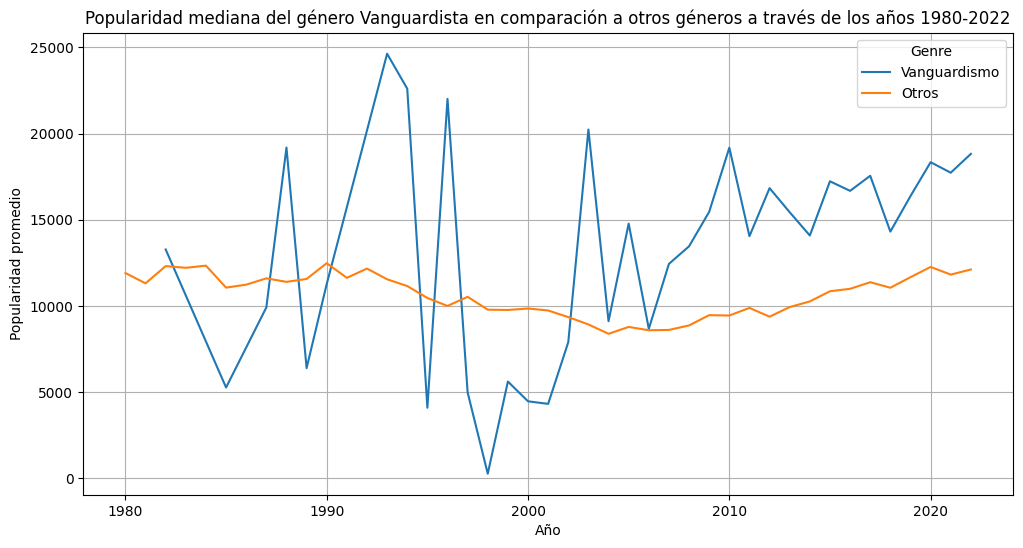

In [ ]:
# Agrupar por año
vang_mediana = data_vanguardismo.groupby('Year')['Popularity'].mean().reset_index()
vang_mediana['Genre'] = 'Vanguardismo'

otros_mediana = otros_generos.groupby('Year')['Popularity'].mean().reset_index()
otros_mediana['Genre'] = 'Otros'

# Concatenar
vang_promedio = pd.concat([vang_mediana, otros_mediana])

# Gráfico usando seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=vang_promedio, x='Year', y='Popularity', hue='Genre')
plt.title('Popularidad mediana del género Vanguardista en comparación a otros géneros a través de los años 1980-2022')
plt.xlabel('Año')
plt.ylabel('Popularidad promedio')
plt.grid(True)
plt.show()

Dada la similitud de los gráficos se puede sugerir que la distribución de los datos no es muy sesgada ni contiene valores outliers que afecten de manera significativa

A partir de ello, puede decirse que el anime de género Vanguardista experimenta picos de popularidad significativamente más altos en comparación al resto de los géneros en conjunto. Esto puede venir dado debido al caracter innovador del vanguardismo y al tipo de público que éste atrae. Sería interesante ver qué animes se produjeron en los años de popularidad más elevada y analizar el contenido en busca de alguna especificidad o relación con el contexto de la época


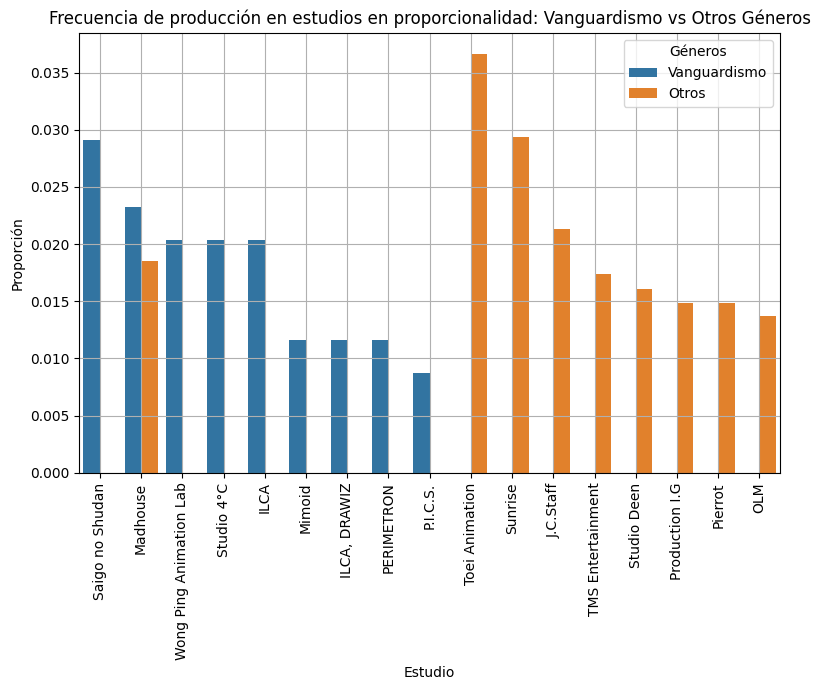

In [ ]:
#Ahora me interesa identificar los estudios de producción que producen más animes vanguardistas y compararlos con los estudios que producen otros géneros.

#Ver la frecuencia de estudios en animes vanguardistas y en Otros. Despues Normalizar
estudios_vanguardismo = data_vanguardismo['Studios'].value_counts(normalize=True).reset_index()
estudios_vanguardismo.columns = ['Studio', 'Proportion']
estudios_vanguardismo['Genre'] = 'Vanguardismo'

estudios_otros = otros_generos['Studios'].value_counts(normalize=True).reset_index()
estudios_otros.columns = ['Studio', 'Proportion']
estudios_otros['Genre'] = 'Otros'

#Como hay demasiados estudios en la base, voy a usar solo los 10 primeros más frecuentes en Vanguardismo y los 10 más frecuentes en en Otros géneros
top_estudios_vang = estudios_vanguardismo.head(10)
top_estudios_otros = estudios_otros.head(10)

#También voy a eliminar los valores UNKNOWN de los estudios, porque dan mucho outliers
top_estudios_vang = top_estudios_vang[top_estudios_vang['Studio'] != 'UNKNOWN']
top_estudios_otros = top_estudios_otros[top_estudios_otros['Studio'] != 'UNKNOWN']

# Concatenar
top_estudios = pd.concat([top_estudios_vang, top_estudios_otros])

# Grafico de barras
plt.figure(figsize=(8, 7))
sns.barplot(data=top_estudios, x='Studio', y='Proportion', hue='Genre')
plt.title('Frecuencia de producción en estudios en proporcionalidad: Vanguardismo vs Otros Géneros')
plt.xlabel('Estudio')
plt.ylabel('Proporción')
plt.xticks(rotation=90)
plt.legend(title="Géneros")
plt.grid(True)
plt.tight_layout()
plt.show()


Los 10 estudios que más producen anime vangurdista y de otros géneros no son los mismos. Madhouse es la única excepción, lo cual puede sugerir una mayor diversificación en la producción de contenido.
Viendo la proporción de producción en los estudios propios del género vanguardista se aprecia que es más distribuida y no tan concentrada como en aquellos estudios que trabajan con otros géneros.

En otros géneros, hay una clara dominancia de unos dos grandes estudios  (Toei y Sunrise) que producen una mayor proporción de contenido convencional

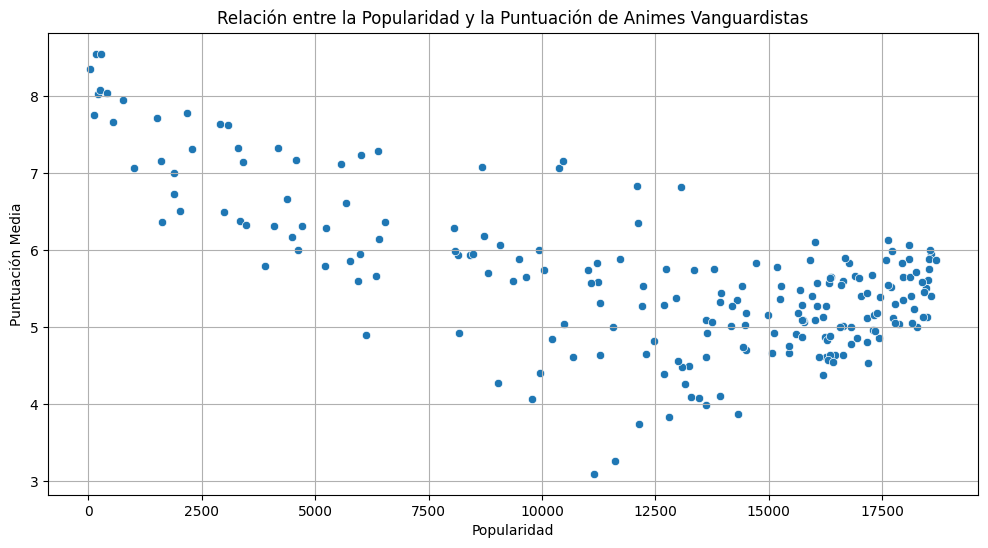

In [ ]:
#Como ejercicio descriptivo final voy a revisar si existe alguna relación interesante entre la popularidad y puntuación de animes vanguardistas, visualizándola con un gráfico de puntos

# Eliminar filas con Popularity y Score igual a 0 (que venian a reemplazar los valores UNKNOWN)
data_vanguardismo = data_vanguardismo[data_vanguardismo['Popularity'] > 0]
data_vanguardismo = data_vanguardismo[data_vanguardismo['Score'] > 0]

# Crear el scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_vanguardismo, x='Popularity', y='Score')
plt.title('Relación entre la Popularidad y la Puntuación de Animes Vanguardistas')
plt.xlabel('Popularidad')
plt.ylabel('Puntuación Media')
plt.grid(True)
plt.show()

Lo primero que se nota es la falta de un patrón claro entre popularidad y puntuación dentro del anime vanguardista. Es decir, la popularidad no sería un buen predictor de la puntuación.

Aunque se necesitarían más datos para confirmarlo, se podría argumentar que, dado el carácter del público del anime vanguardista y sus expectativas, la valoración de las producciones dentro de este género se ve más influenciada por aspectos innovadores en las tramas y el arte. De esta manera, esto desafía las expectativas de un público más conformista o generalizado, y podría llegar a influir en ciertas valoraciones negativas. Por otro lado, podría argumentarse que los anime vanguardistas que no alcanzan una popularidad demasiado alta serían recibidos por un público más específico y crítico, valorando más la innovación y la complejidad de las temáticas que la aceptación general.


#Aprendizaje supervisado

Dado que la popularidad no es un buen predictor de la puntuación en el anime vanguardista, voy a elaborar un ejercicio de aprendizaje supervisado para ver si esta tendencia es generalizada. Para ello, utilizaré Score como variable dependiente y Favorites, Type, Year, Studio, Source, y finalmente, volveré a intentarlo con Popularity como variables independientes.

In [ ]:
#Preprocesamiento de datos

#Convertir las columnas Score, Favorites, y Popularity a un formato numérico y dejar como nulas las que no puedan convertirse

data_vanguardismo['Score'] = pd.to_numeric(data_vanguardismo['Score'], errors='coerce')
data_vanguardismo['Favorites'] = pd.to_numeric(data_vanguardismo['Favorites'], errors='coerce')
data_vanguardismo['Popularity'] = pd.to_numeric(data_vanguardismo['Popularity'], errors='coerce')

#Convertir variables categoricas a dummy

data_vanguardismo = pd.get_dummies(data_vanguardismo, columns=['Type', 'Studios', 'Source'], drop_first=True)

#Eliminar datos nulos

data_vanguardismo = data_vanguardismo.dropna(subset=['Score', 'Favorites', 'Year', 'Popularity'])

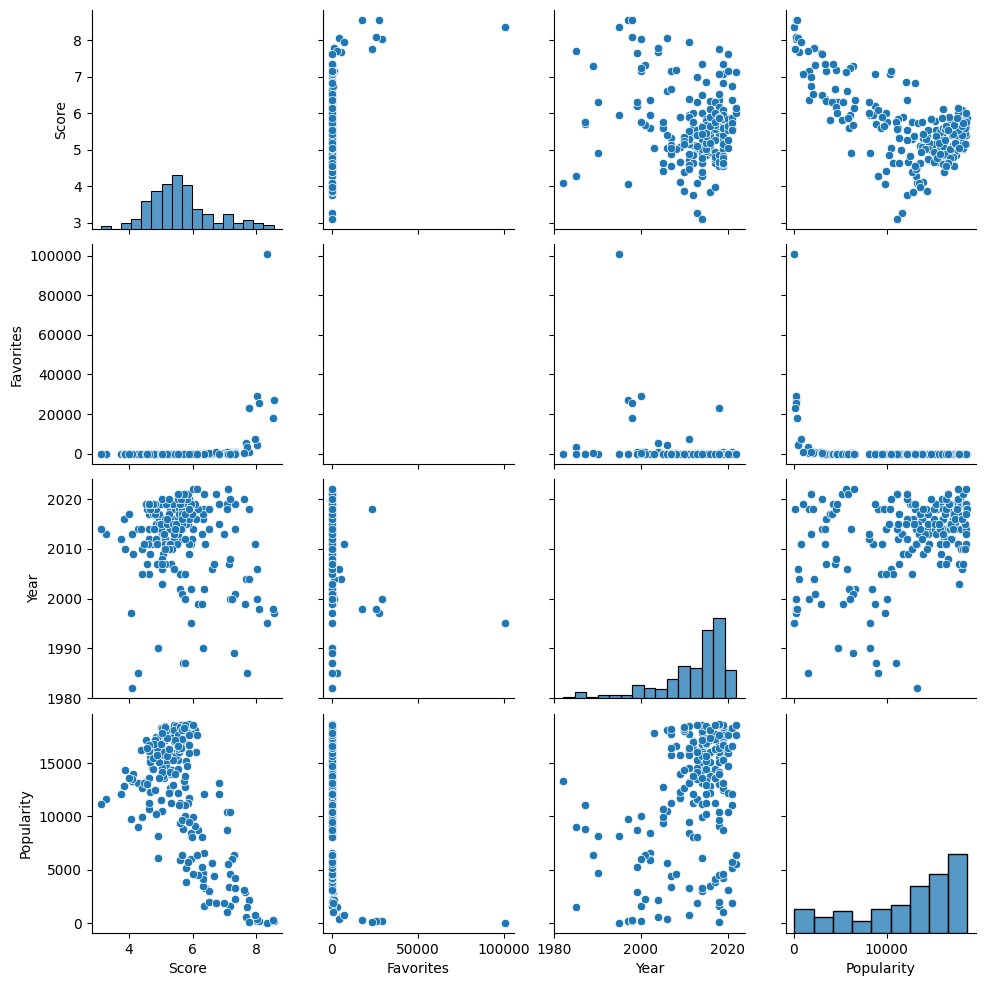

In [ ]:
#Generar matriz de dispersión

sns.pairplot(data_vanguardismo[['Score', 'Favorites', 'Year', 'Popularity']])
plt.show()

*	No se observa una fuerte correlación lineal entre la puntuación de los animes vanguardistas y las demás variables (Favorites, Year, Popularity)
* Existen demasiados valores 0 o cercanos a 0 en Favoritos.
*	Los animes vanguardistas lanzados en años más recientes tienden a tener mayor popularidad y más marcaciones de favoritos. Esto puede venir dado por la relativamente reciente proliferación del streaming
*	Dado que no se observan relaciones muy claras, se utilizaran modelos más completos para ver las interacciones entre variables

##Regresión Lineal

In [ ]:
# Seleccionar las variables independientes y la variable dependiente
X = data_vanguardismo[['Favorites', 'Year', 'Popularity'] +
         [col for col in data_vanguardismo.columns if col.startswith('Type_') or col.startswith('Studio_') or col.startswith('Source_')]]
y = data_vanguardismo['Score']

# Dividir conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coeficiente de Determinación (R^2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mostrar los coeficientes del modelo para evaluar su desempeño
coef = pd.Series(model.coef_, index=X.columns)
print(coef)

Error Cuadrático Medio (MSE): 0.3645505953035473
Mean Absolute Error (MAE): 0.4773105061175202
Coeficiente de Determinación (R^2): 0.3734864822199092
Root Mean Squared Error (RMSE): 0.6037802541517462
Favorites              2.461177e-05
Year                   1.922091e-02
Popularity            -1.302325e-04
Type_Music             4.535493e-01
Type_ONA              -1.837232e-01
Type_OVA               4.858934e-01
Type_Special           2.493175e-02
Type_TV                4.472089e-02
Source_Game            1.665335e-16
Source_Light novel     2.359665e-02
Source_Manga          -2.577853e-01
Source_Music          -1.956762e-01
Source_Novel           5.097250e-01
Source_Original       -1.133491e-01
Source_Other           4.951919e-02
Source_Unknown        -1.603017e-02
Source_Visual novel    0.000000e+00
dtype: float64



* El modelo explica aproximadamente el 37% de la variabilidad en las puntuaciones (Score), lo que sugiere que hay otros factores no incluidos en el modelo que influyen en la puntuación
* La cantidad de favoritos tiene una correlación positiva con la puntuación. No así la popularidad, que tiene un impacto negativo.
* El tipo de emisión en formato OVA y Música y la fuente de emisión de Novela y Otros parecen tener un impacto más significativo en la puntuación. Por otro lado, la emisión tipo de ONA tiene un impacto negativo con la puntuación, al igual que las fuente de Manga y Música.

##XGBOOST

In [ ]:
#Hacer ahora un XGBOOST
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#VALIDACIÓN
# Error cuadrático medio (MSE)
mse_xgb = metrics.mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse_xgb)

#Mean Absolute Error (MAE)
mae_xgb = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE)", mae_xgb)

# Coeficiente de determinación (R^2)
r2_xgb = r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R^2):", r2_xgb)

#Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse_xgb)

Error Cuadrático Medio (MSE): 0.39233277576034875
Mean Absolute Error (MAE) 0.4982800978422165
Coeficiente de Determinación (R^2): 0.3257402658268219
Root Mean Squared Error (RMSE): 0.6037802541517462


Comparado con los resultados anteriores, los valores de MSE, MAE, y R² indican que este modelo tiene un rendimiento ligeramente inferior y explicaría menos variabilidad en los datos.

##K-Nearest Neighbors (KNN)

In [ ]:
model = KNN(n_neighbors=20, weights="distance", metric="manhattan" )
model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=20, weights='distance')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#VALIDACIÓN
# Error cuadrático medio (MSE)
mse_KNN = metrics.mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse_KNN)

#Mean Absolute Error (MAE)
mae_KNN = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE)", mae_KNN)

# Coeficiente de determinación (R^2)
r2_KNN = r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R^2):", r2_KNN)

#Root Mean Squared Error (RMSE)
rmse_KNN = np.sqrt(rmse)
print("Root Mean Squared Error (RMSE):", rmse_KNN)

Error Cuadrático Medio (MSE): 0.3318282671979798
Mean Absolute Error (MAE) 0.4824676365826741
Coeficiente de Determinación (R^2): 0.4297227938745454
Root Mean Squared Error (RMSE): 0.7770329813796492


El R2 sugiere que el modelo explica aproximadamente el 42.97% de la variabilidad en las puntuaciones. Este es un valor considerablemente más alto que los R² anteriores (0.3257 y 0.3735), lo que indica que el modelo actual tiene una mejor capacidad explicativa

##Random Forest

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#VALIDACIÓN

# Error cuadrático medio (MSE)
mse_rf = metrics.mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse_rf)

#Mean Absolute Error (MAE)
mae_rf = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE)", mae_rf)

# Coeficiente de determinación (R^2)
r2_rf = r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R^2):", r2_rf)

#Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse_rf)

Error Cuadrático Medio (MSE): 0.3018860898437499
Mean Absolute Error (MAE) 0.4388765625000002
Coeficiente de Determinación (R^2): 0.481181162358552
Root Mean Squared Error (RMSE): 0.6037802541517462


El R2 de 0.4845 sugiere que el modelo explica aproximadamente el 48.45% de la variabilidad en las puntuaciones. Este es el mayor R2 registrado hasta ahora, lo que indica que el modelo tiene una capacidad explicativa superior.

#Conclusión

In [ ]:
#Redondenado el Coeficiente de determinación (R^2) para comparar porcentaje de eficacia
print(f'Regresion Lineal: {r2*100//1}%')
print(f'XGBOOST: {r2_xgb*100//1}%')
print(f'KNN: {r2_KNN*100//1}%')
print(f'Random Forest: {r2_rf*100//1}%')

Regresion Lineal: 37.0%
XGBOOST: 32.0%
KNN: 42.0%
Random Forest: 48.0%


De los modelos evaluados, Random Forest ha mostrado el mejor desempeño, explicando el 48.0% de la variabilidad en los datos.